<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/Testes_de_Hiper_Par%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pesquisa de Hiperparâmetros
Na MLP da Biblioteca Scikit-learn


#Declarações Globais

In [ ]:
pip install -U scikit-learn 

     |████████████████████████████████| 22.3MB 2.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection    import train_test_split,RepeatedStratifiedKFold 
from sklearn.preprocessing      import StandardScaler        #Normalização dos dados
from sklearn.decomposition      import PCA                   #Redução de Dimencionalidade
from sklearn.pipeline           import make_pipeline         #Pipe Line
from sklearn.neural_network     import MLPRegressor
from sklearn.metrics            import mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
seed = 170696
np.seed = seed

In [ ]:
urldfCC = 'https://raw.githubusercontent.com/lvb86/MLPr_GA/main/swap/dfConsumoClima2.csv'
df = pd.read_csv(urldfCC)

In [ ]:
d = df.iloc[:,2:-3]
d.head()

,Consumo,Ano,Mês,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd
0,339480.0,2013,1,9.083333,117.477778,976.542712,22.323023,9.236111,3.053842
1,414663.0,2013,2,13.777778,148.188889,975.360036,22.569606,9.458333,2.835475
2,323379.0,2013,3,13.527778,146.822222,977.684966,19.726666,9.613889,2.849183
3,254855.0,2013,4,11.055556,119.877778,978.880230,18.709059,8.636111,2.475605
4,212174.0,2013,5,15.527778,110.616667,979.065763,15.344357,9.613889,2.375910


Objetivo prever o ano seguinte ... 
como a base é 2013-2019 

treino com 2013- 2017
teste com 2018

In [ ]:
X_train = d.iloc[:-12,].drop('Consumo', axis =1)
y_train = d['Consumo'].iloc[:-12,]

X_test = d.iloc[-12:,].drop('Consumo', axis =1)
y_test = d['Consumo'].iloc[-12:,]

Funções Compartilhadas

In [ ]:
def graf_bar(x,y,Xlabel, rot):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    g= sns.barplot(x=x,y=y, palette='rocket')
    
    for i in range(len(x)):
        g.text(i,y[i]+0.001, round(y[i],3), color='black', ha="center", fontsize=15)
    plt.xticks(rotation = rot, fontsize=15)
    #plt.ylim(0,1.1)
    plt.ylabel('MAPE')
    plt.xlabel(Xlabel)

    plt.show();

#Testes

## Melhor configuração

In [ ]:
#hidden_layer_sizes = (8,16,32,4)
hidden_layer_sizes = (2,3,59,38)
activation='relu'
random_state=1
max_iter=100_000
alpha = 0.0001
learning_rate_init = 0.001
shuffle = True
beta_1 = 0.94
beta_2 = 0.999
epsilon = 0.000_000_000_1
n_iter_no_change=1000
solver='adam'
verbose = False

In [ ]:
pipe_mlp = make_pipeline(StandardScaler(),                
                         #PCA(n_components=i),
                         MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                        activation=activation,
                                        random_state=random_state,
                                        max_iter=max_iter,
                                        alpha = alpha,
                                        learning_rate_init = learning_rate_init,
                                        shuffle = shuffle,
                                        beta_1 = beta_1,
                                        beta_2 = beta_2,
                                        epsilon = epsilon,
                                        n_iter_no_change=n_iter_no_change,
                                        solver=solver,
                                        verbose = verbose
                                      )
                         )

In [ ]:
pipe_mlp.get_params()

{'memory': None,
 'mlpregressor': MLPRegressor(beta_1=0.94, epsilon=1e-10, hidden_layer_sizes=(2, 3, 59, 38),
              max_iter=100000, n_iter_no_change=1000, random_state=1),
 'mlpregressor__activation': 'relu',
 'mlpregressor__alpha': 0.0001,
 'mlpregressor__batch_size': 'auto',
 'mlpregressor__beta_1': 0.94,
 'mlpregressor__beta_2': 0.999,
 'mlpregressor__early_stopping': False,
 'mlpregressor__epsilon': 1e-10,
 'mlpregressor__hidden_layer_sizes': (2, 3, 59, 38),
 'mlpregressor__learning_rate': 'constant',
 'mlpregressor__learning_rate_init': 0.001,
 'mlpregressor__max_fun': 15000,
 'mlpregressor__max_iter': 100000,
 'mlpregressor__momentum': 0.9,
 'mlpregressor__n_iter_no_change': 1000,
 'mlpregressor__nesterovs_momentum': True,
 'mlpregressor__power_t': 0.5,
 'mlpregressor__random_state': 1,
 'mlpregressor__shuffle': True,
 'mlpregressor__solver': 'adam',
 'mlpregressor__tol': 0.0001,
 'mlpregressor__validation_fraction': 0.1,
 'mlpregressor__verbose': False,
 'mlpregressor__

## Estrutura

In [ ]:

dic_param = {
1:(2,),
2:(8, 4),
3:(8, 4, 2),
4:(8, 16, 4, 2),
5:(8, 16, 8, 4, 2),
6:(8, 16, 32, 8, 4, 2),
7:(8, 16, 32, 16, 8, 4, 2),
8:(8, 16, 32, 64, 16, 8, 4, 2),
9:(8, 16, 32, 64, 32, 16, 8, 4, 2),
10:(8, 16, 32, 64, 128, 32, 16, 8, 4, 2)}

dic_param2 = {
1:(8,),
2:(8, 4),
3:(8, 8, 4),
4:(8, 16, 32, 4),
5:(8, 16, 32, 64, 4),
6:(8, 16, 32, 64, 128, 4),
7:(8, 16, 32, 64, 128, 256, 4),
8:(8, 16, 32, 64, 128, 256, 512, 4),
9:(8, 16, 32, 64, 128, 256, 512, 1024, 4),
10:(8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4)}

dic_param3 = {
1:(8,16,32,2),
2:(8,32,16,2),
3:(8,32,16,4),
4:(8,32,64,2),
5:(8,64,32,2),
6:(8,32,64,4),
7:(8,64,32,4)}

(8, 16, 32, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.9997093356351178
(8, 32, 16, 2)
mape | 0.2680576607277087
(8, 32, 16, 4)
mape | 0.2900172471760792
(8, 32, 64, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.9997102355160067
(8, 64, 32, 2)
mape | 0.23826455489106593
(8, 32, 64, 4)
mape | 0.1070558557701008
(8, 64, 32, 4)
mape | 0.284441216396158


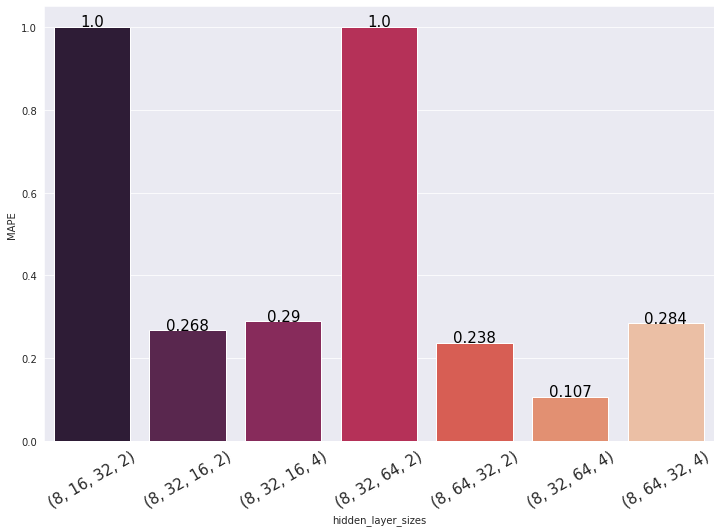

In [ ]:
mape = [] 
Lparam = []
for i in dic_param3:
    print(dic_param3[i])
    p = dic_param3[i]
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= p,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'hidden_layer_sizes', 30)


resultados agrupados

In [ ]:
url = 'https://github.com/lvb86/MLPr_GA/blob/main/swap/ResultadosRede.xlsx?raw=true'
top10=pd.read_excel(url, ).iloc[0:10,:]

In [ ]:
top10

,#,Grupo Teste,exp,N max,Profundidade,Estrutura,MAPE,Ranking
0,108,Diamante,6,64,9,"(8, 16, 32, 64, 32, 16, 8, 4, 2)",0.080774,1
1,94,Triang Cres,5,32,4,"(8, 16, 32, 4)",0.082401,2
2,4,Retangular,1,2,4,"(2, 2, 2, 2)",0.094267,3
3,5,Retangular,1,2,5,"(2, 2, 2, 2, 2)",0.094373,4
4,2,Retangular,1,2,2,"(2, 2)",0.094536,5
5,6,Retangular,1,2,6,"(2, 2, 2, 2, 2, 2)",0.094538,6
6,12,Retangular,2,4,2,"(4, 4)",0.096849,7
7,19,Retangular,2,4,9,"(4, 4, 4, 4, 4, 4, 4, 4, 4)",0.097687,8
8,96,Triang Cres,7,128,6,"(8, 16, 32, 64, 128, 4)",0.097689,9
9,123,Var Melhor,6,64,4,"(8, 64, 32, 2)",0.109295,10


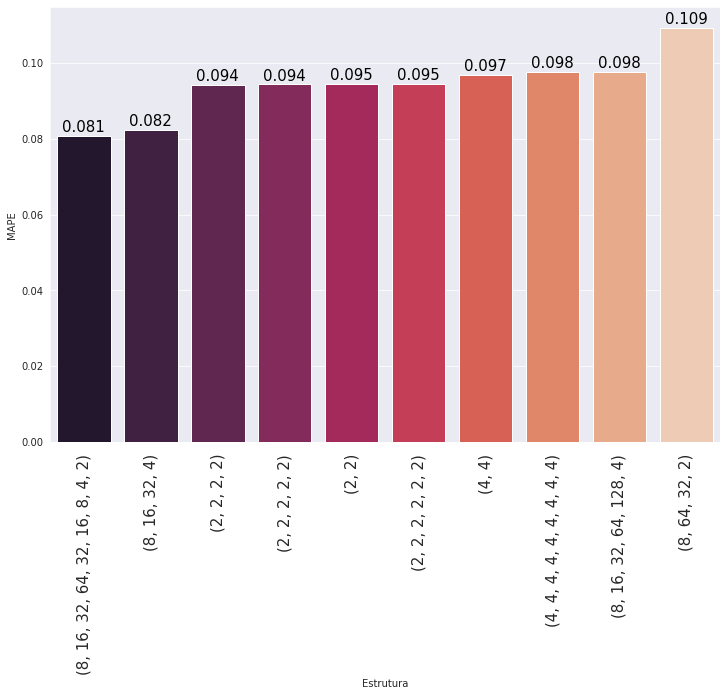

In [ ]:
graf_bar(top10.Estrutura,top10.MAPE,'Estrutura',90)

##Função de ativação

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154
mape | 0.09453864201022678


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.9886745528499845
mape | 0.9888398383522398


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


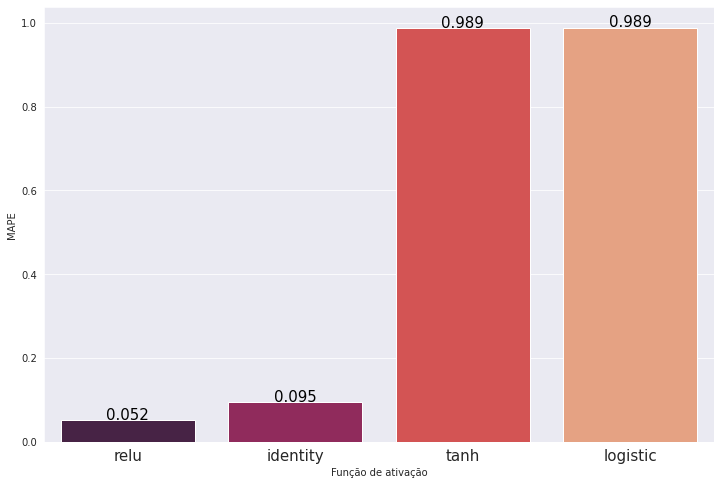

In [ ]:
param = ['relu','identity','tanh','logistic']
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=p,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    print('mape','|',m)
graf_bar(param,mape,'Função de ativação',0)

##Solver

mape | 0.10546038197758302
mape | 192186.96816118216
mape | 0.05237915800858154


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


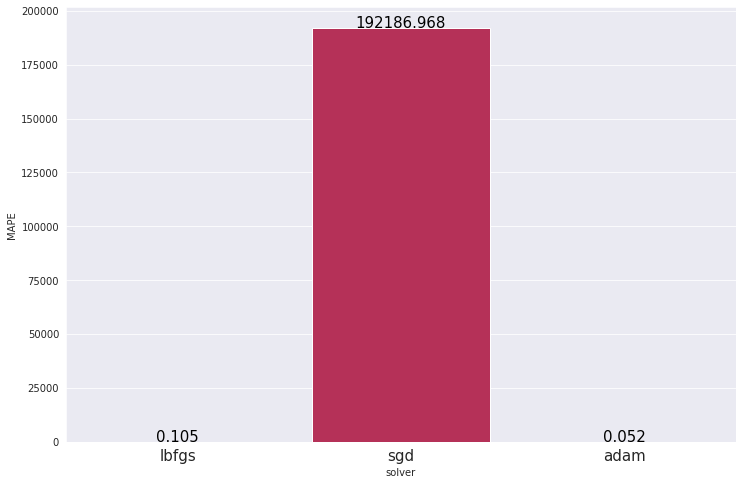

In [ ]:
param = ['lbfgs', 'sgd', 'adam']

mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=p,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    print('mape','|',m)
graf_bar(param,mape,'solver', 0)

##Alpha

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.06356684636046908
mape | 0.07847916536863085


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.057577482827687786


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.07081198463054965


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154
mape | 0.06909041438203264


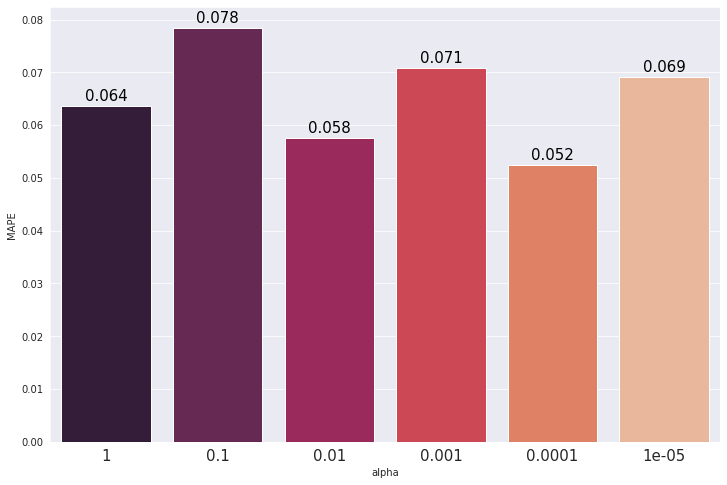

In [ ]:
param = [1,0.1,0.01,0.001,0.0001,0.00001]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = p,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'alpha', 0)

##Learning Rate

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.9209044683405329


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.1011142998384445


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154
mape | 0.09421488881946934
mape | 0.09363407054712482
mape | 0.9970919067289228
mape | 0.9942186512278816


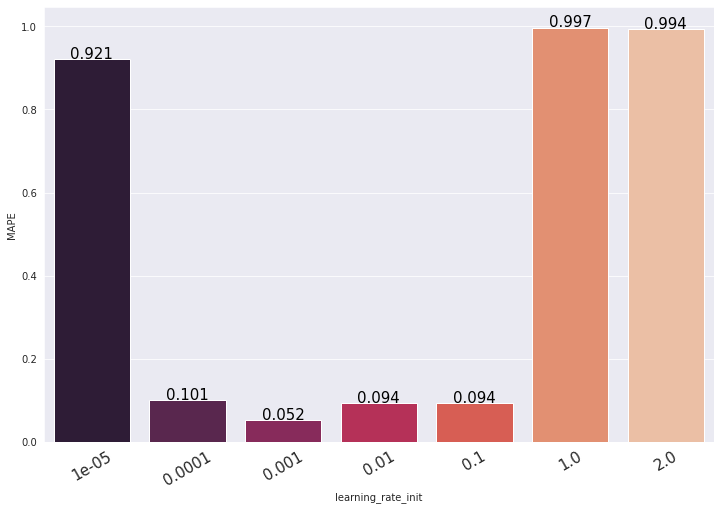

In [ ]:
param = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = p,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'learning_rate_init', 30)

##Shuffle

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154
mape | 0.05237915800804336


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


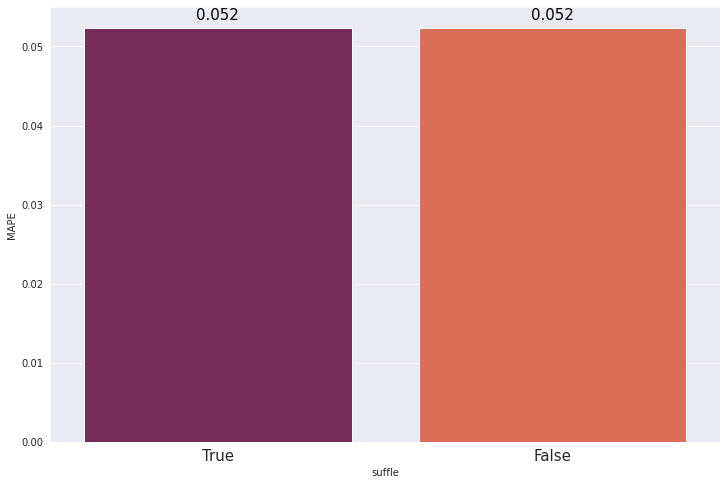

In [ ]:
param = [True, False]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = p,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'suffle', 0)

##Beta 1 

mape | 0.07876132901560526
mape | 0.07883387635226201
mape | 0.07873592413308579
mape | 0.07862713517199722
mape | 0.06709121772745837


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.08185112384737145
mape | 0.06912203796414258
mape | 0.06909238210247791


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.08625952826383688
mape | 0.05906896810230589
mape | 0.07846286224229249
mape | 0.09828230556672601


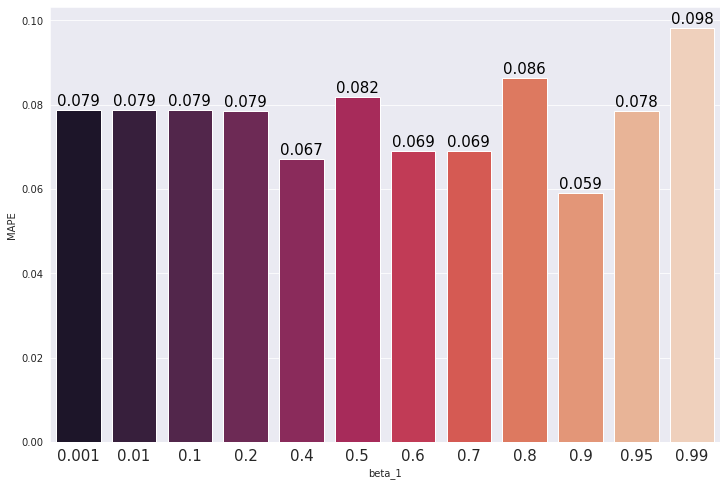

In [ ]:
param = [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = p,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'beta_1', 0)

##Beta 2

mape | 0.08423621130676694


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.11004968240918757


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.24887500476074387


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.12326231813370118
mape | 0.08013693810819054
mape | 0.07473888725608573


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.08698242516532285


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.0634148397925023


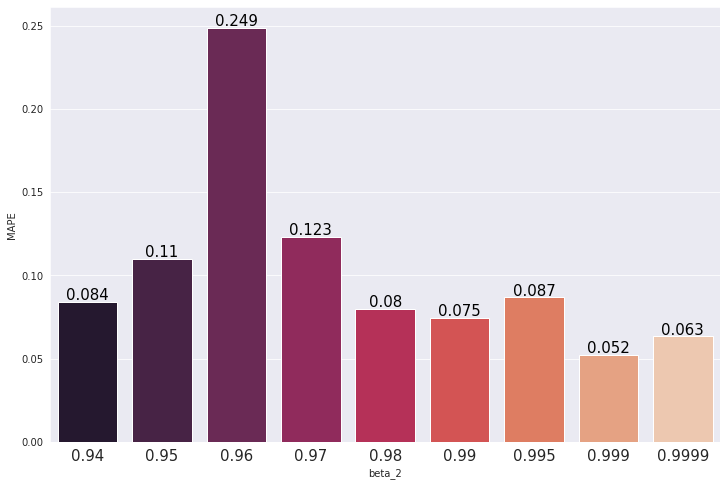

In [ ]:
param = [0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999, 0.9999]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = p,
                                            epsilon = epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'beta_2', 0)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05784088390380623
mape | 0.07855058772970618
mape | 0.07843890890760377


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.11579732549797735


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.17794359588252218
mape | 0.07856680013322541
mape | 0.07845580174951967


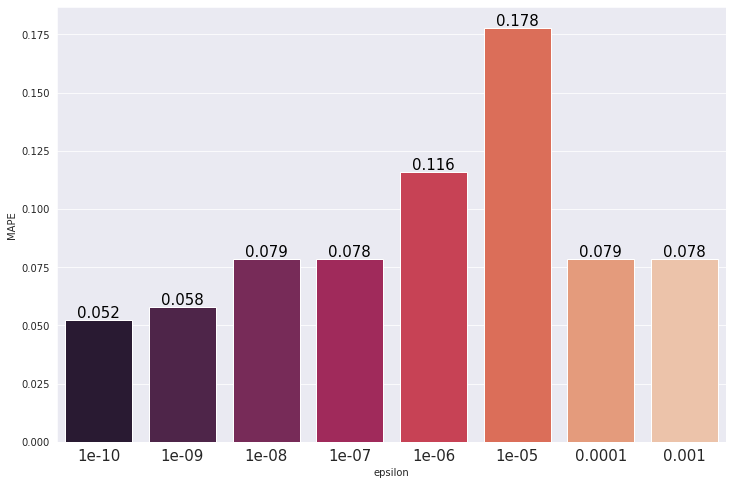

In [ ]:
param = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = p,
                                            n_iter_no_change=n_iter_no_change,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'epsilon', 0)

mape | 0.1058370381471027
mape | 0.1124241403568434
mape | 0.055871270741177974
mape | 0.05503282035730719
mape | 0.05499509944351624
mape | 0.0548757205178057
mape | 0.05653884715780642
mape | 0.05669727403190878
mape | 0.056545981774916106


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mape | 0.05237915800858154


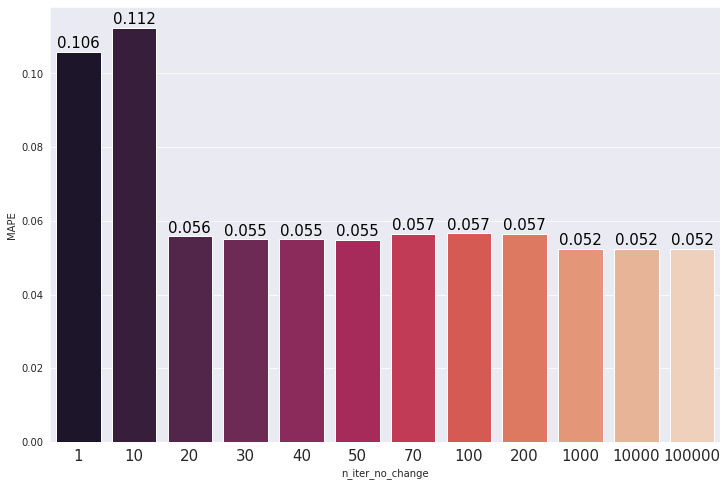

In [ ]:
param = [1,10,20,30,40,50,70,100,200,1000,10000,100000]
Lparam = []
mape = [] 
for e, p in enumerate(param):
    pipe_mlp = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= hidden_layer_sizes,
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=p,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
    pipe_mlp.fit(X_train, y_train)
    y_pred = pipe_mlp.predict(X_test)
    m = mean_absolute_percentage_error(y_test,y_pred)
    mape.append(m)
    Lparam.append(str(p))
    print('mape','|',m)
graf_bar(Lparam,mape,'n_iter_no_change', 0)

#Comparativo

##MLP

In [ ]:
pipe_mlp1 = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= (8,16,32,4),
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=p,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
pipe_mlp1.fit(X_train, y_train)
y_pred1 = pipe_mlp1.predict(X_test)
m = mean_absolute_percentage_error(y_test,y_pred1)
print('mape','|',m)

mape | 0.07684978503509012


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##MLP+GA

In [ ]:
pipe_mlp2 = make_pipeline(StandardScaler(),                
                            #PCA(n_components=i),
                            MLPRegressor(hidden_layer_sizes= (2,3,59,38),
                                            activation=activation,
                                            random_state=random_state,
                                            max_iter=max_iter,
                                            alpha = alpha,
                                            learning_rate_init = learning_rate_init,
                                            shuffle = shuffle,
                                            beta_1 = beta_1,
                                            beta_2 = beta_2,
                                            epsilon = epsilon,
                                            n_iter_no_change=p,
                                            solver=solver,
                                            verbose = verbose
                                        )
                            )
    
pipe_mlp2.fit(X_train, y_train)
y_pred2 = pipe_mlp2.predict(X_test)
m = mean_absolute_percentage_error(y_test,y_pred2)
print('mape','|',m)

mape | 0.05237915800858154


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##Graficos Comparativos

In [ ]:
df['ConsumoMLP'] = 0
df['ConsumoMLP2'] = 0
y_pred_serie = (np.zeros(60)*np.nan).tolist()+y_pred.tolist()
y_pred2_serie = (np.zeros(60)*np.nan).tolist()+y_pred2.tolist()
df['ConsumoMLP'] = y_pred_serie
df['ConsumoMLP2'] = y_pred2_serie
df

,Unnamed: 0,Ano Mês,Consumo,Ano,Mês,Dias com Precipitação,Precipitação,Pressão,Temperatura,Vento Máx,Vento Méd,Consumo Médio,Rlin,Consumo_fuzzy,ConsumoMLP,ConsumoMLP2
0,0,2013-01,339480.000,2013,1,9.083333,117.477778,976.542712,22.323023,9.236111,3.053842,321283.643833,275264.325208,354944.504409,NaN,NaN
1,1,2013-02,414663.000,2013,2,13.777778,148.188889,975.360036,22.569606,9.458333,2.835475,321283.643833,276560.644042,428227.749572,NaN,NaN
2,2,2013-03,323379.000,2013,3,13.527778,146.822222,977.684966,19.726666,9.613889,2.849183,321283.643833,277856.962877,293313.030152,NaN,NaN
3,3,2013-04,254855.000,2013,4,11.055556,119.877778,978.880230,18.709059,8.636111,2.475605,321283.643833,279153.281711,270431.022388,NaN,NaN
4,4,2013-05,212174.000,2013,5,15.527778,110.616667,979.065763,15.344357,9.613889,2.375910,321283.643833,280449.600546,266298.961963,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,2018-08,284391.552,2018,8,13.378378,112.513514,983.580447,12.728181,8.672973,2.752923,321283.643833,362117.687121,267964.098972,263370.058602,263370.058602
68,68,2018-09,281438.973,2018,9,15.135135,186.659459,979.606405,17.418561,10.337838,2.976997,321283.643833,363414.005955,267181.327760,295682.094835,295682.094835
69,69,2018-10,278643.915,2018,10,11.432432,152.600000,979.110829,18.337759,8.959459,3.038972,321283.643833,364710.324790,268340.589899,302258.032210,302258.032210
70,70,2018-11,310718.774,2018,11,10.189189,167.870270,977.640798,21.149839,8.681081,3.068813,321283.643833,366006.643624,338533.461536,318107.337751,318107.337751


In [ ]:
dcom = df[['Ano Mês','Consumo Médio' ,'Consumo', 'Rlin', 'Consumo_fuzzy','ConsumoMLP','ConsumoMLP2']]
dcom2018 = dcom.iloc[-12:,:]

In [ ]:
dcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano Mês        72 non-null     object 
 1   Consumo Médio  72 non-null     float64
 2   Consumo        72 non-null     float64
 3   Rlin           72 non-null     float64
 4   Consumo_fuzzy  72 non-null     float64
 5   ConsumoMLP     12 non-null     float64
 6   ConsumoMLP2    12 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


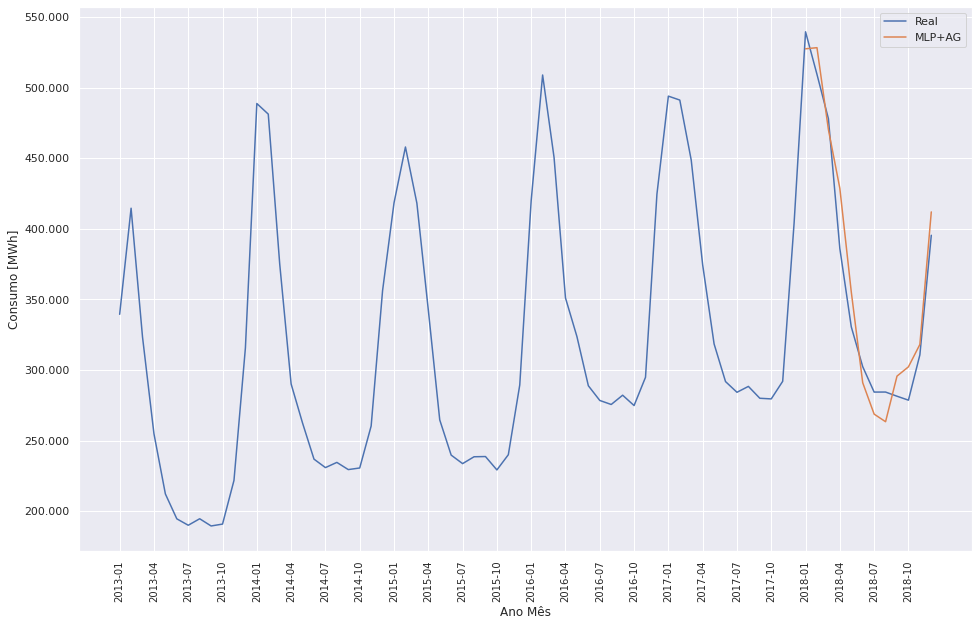

In [ ]:
import matplotlib.ticker    as ticker
def formatador_de_milhares(valor, p):
    valor = f"{valor:,.0f}"
    mapa_de_traducao = str.maketrans(',.', '.,')
    return valor.translate(mapa_de_traducao)

sns.set_theme()
#style.use(DefStyle) 
plt.figure(figsize = (16,10))

ax1 = sns.lineplot(dcom['Ano Mês'],dcom['Consumo'], label = 'Real', palette = 'Dark2')
#ax2 = sns.lineplot(dcom['Ano Mês'],dcom['ConsumoMLP'], label = 'MLP',palette = 'Dark2')
ax2 = sns.lineplot(dcom['Ano Mês'],dcom['ConsumoMLP2'], label = 'MLP+AG',palette = 'Dark2')

plt.legend()
plt.grid('-')
#plt.title('Perfil de consumo Rural no RS Previsto vs Medido', fontsize=17, y=1.05)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Consumo [MWh]')
ax2.set_xticks(ax2.get_xticks()[::3])
plt.xticks(rotation = 90, fontsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

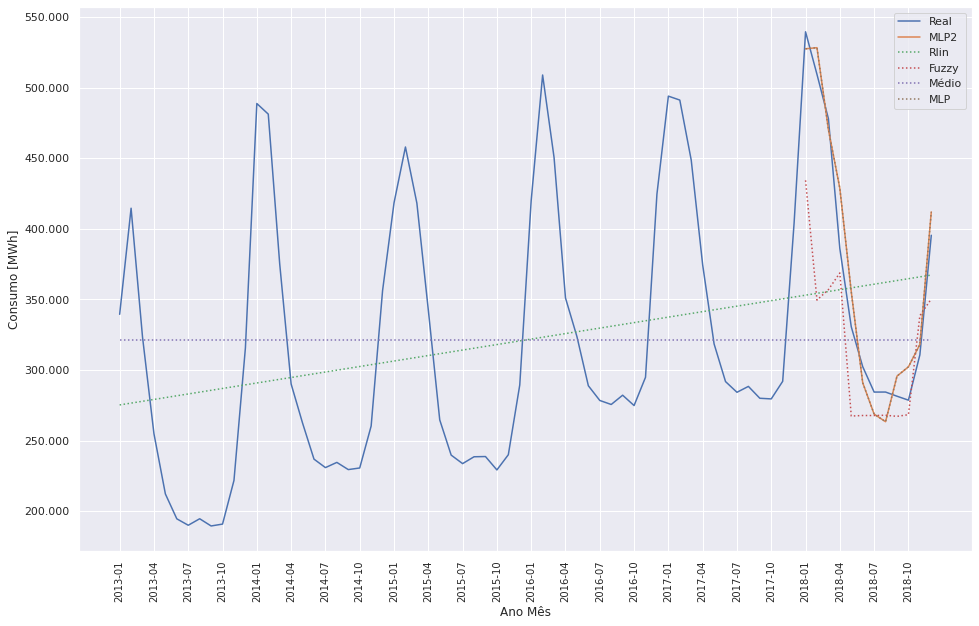

In [ ]:
import matplotlib.ticker    as ticker
def formatador_de_milhares(valor, p):
    valor = f"{valor:,.0f}"
    mapa_de_traducao = str.maketrans(',.', '.,')
    return valor.translate(mapa_de_traducao)

sns.set_theme()
#style.use(DefStyle) 
plt.figure(figsize = (16,10))

ax1 = sns.lineplot(dcom['Ano Mês'],dcom['Consumo'], label = 'Real', palette = 'Dark2')
ax2 = sns.lineplot(dcom2018['Ano Mês'],dcom2018['ConsumoMLP2'], label = 'MLP2',palette = 'Dark2')
ax3 = sns.lineplot(dcom['Ano Mês'],dcom['Rlin'], label = 'Rlin',palette = 'Dark2')
ax4 = sns.lineplot(dcom2018['Ano Mês'],dcom2018['Consumo_fuzzy'], label = 'Fuzzy',palette = 'Dark2')
ax5 = sns.lineplot(dcom['Ano Mês'],dcom['Consumo Médio'], label = 'Médio',palette = 'Dark2')
ax6 = sns.lineplot(dcom2018['Ano Mês'],dcom2018['ConsumoMLP'], label = 'MLP',palette = 'Dark2')
ax6.lines[2].set_linestyle(':')
ax6.lines[3].set_linestyle(':')
ax6.lines[4].set_linestyle(':')
ax6.lines[5].set_linestyle(':')

plt.legend()
plt.grid('-')
#plt.title('Perfil de consumo Rural no RS Previsto vs Medido', fontsize=17, y=1.05)
ax5.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Consumo [MWh]')
ax6.set_xticks(ax6.get_xticks()[::3])
plt.xticks(rotation = 90, fontsize=10)

plt.show();

In [ ]:
dcom2018.columns

Index(['Ano Mês', 'Consumo Médio', 'Consumo', 'Rlin', 'Consumo_fuzzy',
       'ConsumoMLP', 'ConsumoMLP2'],
      dtype='object')

In [ ]:
print('Comparativo de erros por método horizonte 2018')

print('MLP + GA =' , mean_absolute_percentage_error(dcom2018['Consumo'],dcom2018['ConsumoMLP2']))
print('MLP      =' , mean_absolute_percentage_error(dcom2018['Consumo'],dcom2018['ConsumoMLP']))
print('Fuzzy    =' , mean_absolute_percentage_error(dcom2018['Consumo'],dcom2018['Consumo_fuzzy']))
print('Rlin     =' , mean_absolute_percentage_error(dcom2018['Consumo'],dcom2018['Rlin']))
print('Médio    =' , mean_absolute_percentage_error(dcom2018['Consumo'],dcom2018['Consumo Médio']))


Comparativo de erros por método horizonte 2018
MLP + GA = 0.05237915800858154
MLP      = 0.05237915800858154
Fuzzy    = 0.12669562674994653
Rlin     = 0.22049977998803497
Médio    = 0.17804076525379756


In [ ]:
dcom2018.to_csv('/tmp/dfConsumoPrev2018.csv', index= False)
df.to_csv('/tmp/dfConsumoClima3.csv', index= False)

#fim